# Base model

In [13]:
import sys
import os
import importlib
# make the module available from the src directory
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [14]:
from src.models.baseModels.resnet_regression import ResNetModel
importlib.reload(sys.modules['src.models.baseModels.resnet_regression'])

resnet = ResNetModel(data_dir='../datasets/artificial_data/noisy_generated_images', num_epochs=10)
resnet.load_data()
resnet.train()
resnet.evaluate()

Epoch 1/10, Loss: 1611.746337890625
Epoch 2/10, Loss: 1230.1888020833333
Epoch 3/10, Loss: 1153.816162109375
Epoch 4/10, Loss: 941.0454915364584
Epoch 5/10, Loss: 810.9852905273438
Epoch 6/10, Loss: 721.525146484375
Epoch 7/10, Loss: 685.416259765625
Epoch 8/10, Loss: 574.0909627278646
Epoch 9/10, Loss: 498.0252939860026
Epoch 10/10, Loss: 437.0890197753906
Loss of the network on the test images: 160.36990356445312


Original Image Shape: (256, 256, 3)


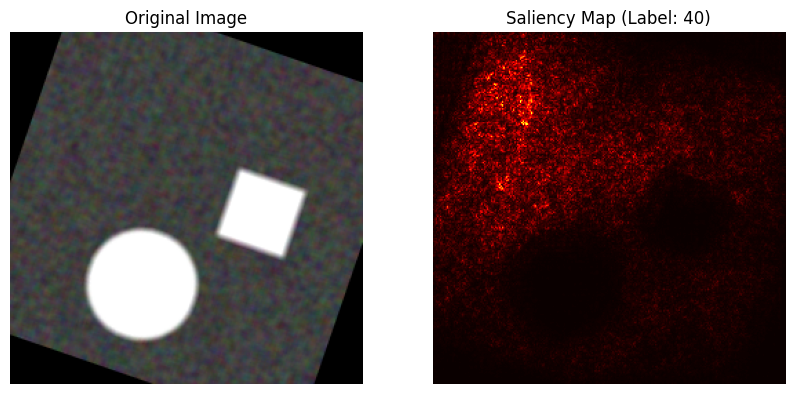

In [31]:
from src.XAI.XAI import XAIResNet

# Assuming XAIResNet was already imported previously
importlib.reload(sys.modules['src.XAI.XAI'])

# Initialize XAI instance
xai_resnet = XAIResNet(modelWrapper=resnet, device=resnet.device)
# Fetch an image and its label from the test data
input_image, input_label = resnet.get_single_test_image(index=9) 
# Check if data was retrieved
if input_image is not None:
    # Generate and view the saliency map for the selected image and label
    xai_resnet.generate_saliency_map(input_image, input_label)